In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
titanicdata=pd.read_csv("../input/train.csv")

In [11]:
titanicdata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
from seaborn import countplot
from matplotlib.pyplot import figure, show

In [13]:
titanicdata.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
titanicdata.shape


(891, 12)

In [15]:
survived_class=pd.crosstab(index=titanicdata['Survived'],columns=titanicdata["Pclass"],margins=True)

In [16]:
survived_class

Pclass,1,2,3,All
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [17]:
#renaming cloumns 
survived_class.columns=["class1","class2","class3","rowtotal"]
survived_class

,class1,class2,class3,rowtotal
Survived,,,,
0,80,97,372,549
1,136,87,119,342
All,216,184,491,891


In [18]:
survived_class.index=["Dies","survived","columntotal"]
survived_class

,class1,class2,class3,rowtotal
Dies,80,97,372,549
survived,136,87,119,342
columntotal,216,184,491,891


In [19]:
surv_gender_class = pd.crosstab(index=titanicdata["Survived"], columns=[titanicdata["Pclass"],titanicdata["Sex"]],margins=True)
surv_gender_class.head()

Pclass        1           2           3       All
Sex      female male female male female male     
Survived                                         
0             3   77      6   91     72  300  549
1            91   45     70   17     72   47  342
All          94  122     76  108    144  347  891

In [20]:
surv_gender_class.index=["died","survived",'columntotal']
surv_gender_class

Pclass           1           2           3       All
Sex         female male female male female male     
died             3   77      6   91     72  300  549
survived        91   45     70   17     72   47  342
columntotal     94  122     76  108    144  347  891

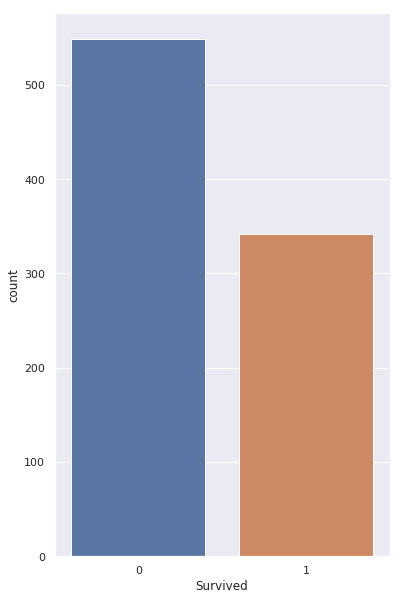

In [21]:
#Plot the count distribution (Bernoulli) of survival  (sns.countplot) 
plt.figure(figsize=(6,10))
sns.set(style="darkgrid")
m = sns.countplot(x="Survived", data=titanicdata)
plt.show()

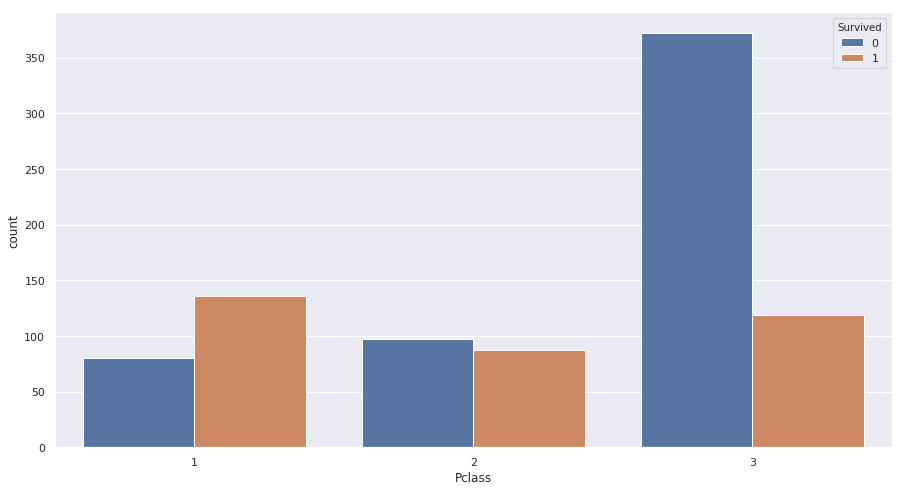

In [32]:
plt.figure(figsize=(15,8))
m = sns.countplot(x="Pclass", hue="Survived", data=titanicdata)

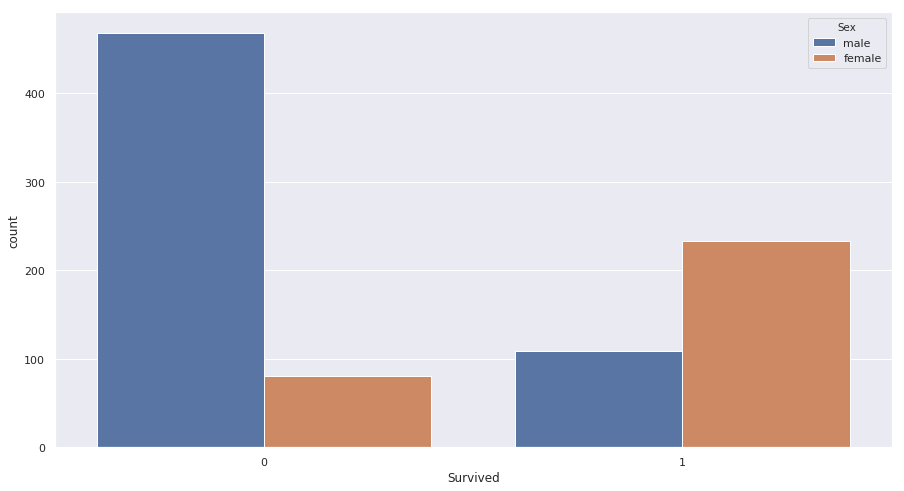

In [23]:
plt.figure(figsize=(15,8))
graph = sns.countplot(x="Survived",hue="Sex" ,data=titanicdata)
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

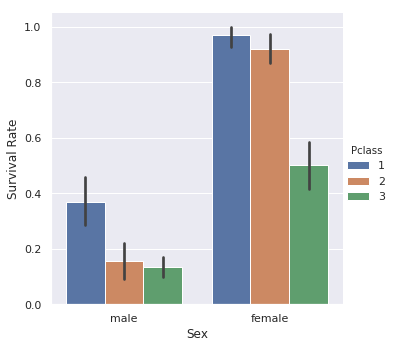

In [24]:
#plt.figure(figsize=(20,10))
sns.catplot(x='Sex', y='Survived', hue='Pclass', data=titanicdata, kind='bar')
plt.ylabel("Survival Rate")
plt.show

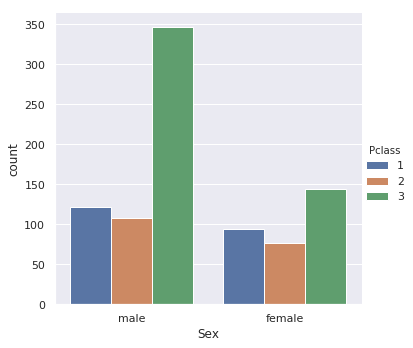

In [25]:

sns.catplot(x="Sex",hue='Pclass' ,kind="count", data=titanicdata)
plt.show()

In [26]:
survived_sib_class = pd.crosstab(titanicdata["SibSp"], titanicdata["Parch"], margins=True)

In [27]:
survived_sib_class

Parch,0,1,2,3,4,5,6,All
SibSp,,,,,,,,
0,537,38,29,1,1,2,0,608
1,123,57,19,3,3,3,1,209
2,16,7,4,1,0,0,0,28
3,2,7,7,0,0,0,0,16
4,0,9,9,0,0,0,0,18
5,0,0,5,0,0,0,0,5
8,0,0,7,0,0,0,0,7
All,678,118,80,5,4,5,1,891


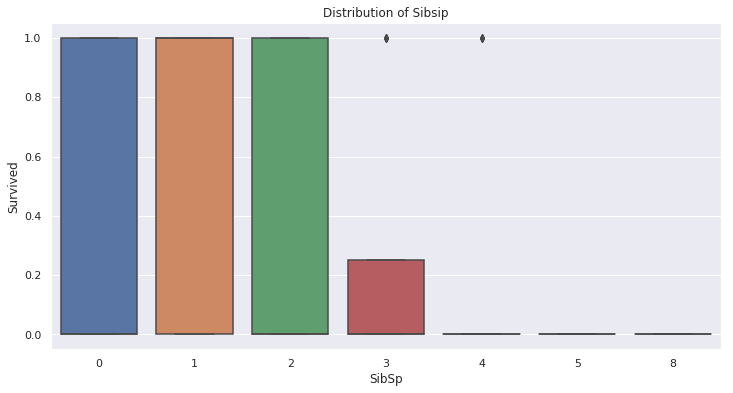

In [28]:
plt.figure(figsize=(12,6))
sns.boxplot('SibSp','Survived',data=titanicdata)
plt.title('Distribution of Sibsip')
plt.show()

<Figure size 864x432 with 0 Axes>

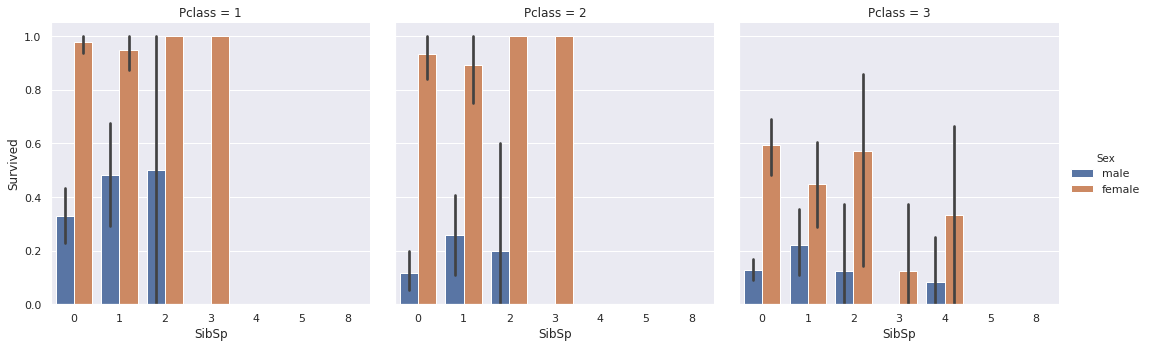

In [29]:
#sibsp vs survived per gender
plt.figure(figsize=(12,6))
sns.catplot(x="SibSp", y="Survived", hue="Sex",col="Pclass", data=titanicdata, kind='bar')
plt.show()

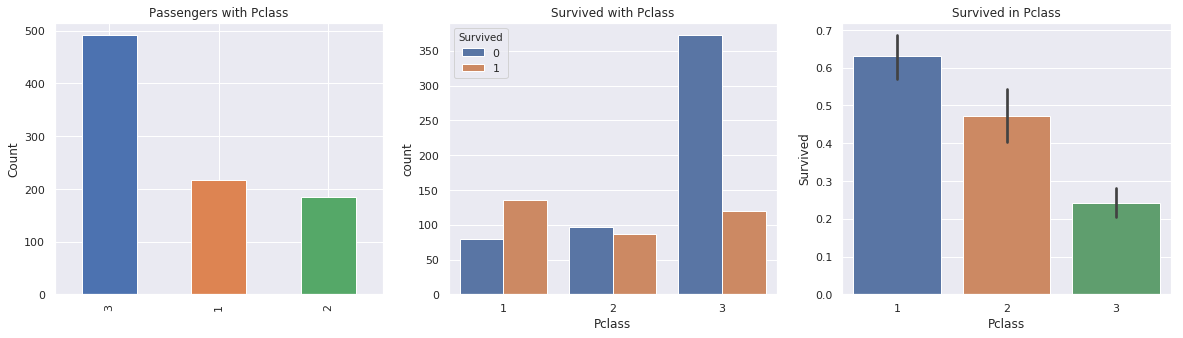

In [33]:
f,ax=plt.subplots(1,3,figsize=(20,5))
titanicdata['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Passengers with Pclass')
ax[0].set_ylabel('Count')
sns.countplot('Pclass',hue='Survived',data=titanicdata,ax=ax[1])
ax[1].set_title('Survived with Pclass')
sns.barplot(x="Pclass", y="Survived", data=titanicdata,ax=ax[2])
ax[2].set_title('Survived in Pclass')
plt.show()

In [ ]:
Plot the distribution of fare for each Pclass, color by Survived, use sns.boxplot  